In [546]:
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

In [547]:
# Import dataset
#path ='dataset/'
from google.colab import files
uploaded = files.upload()

import io
df = pd.read_csv(io.BytesIO(uploaded['insurance.csv']))

print('\nNumber of rows and columns in the data set: ',df.shape)

Saving insurance.csv to insurance (17).csv

Number of rows and columns in the data set:  (1338, 7)


Exploratory data analysis

In [548]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [549]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [550]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [551]:
df.charges.unique()

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [552]:
df.sex.unique()

array(['female', 'male'], dtype=object)

In [553]:
df.smoker.unique()

array(['yes', 'no'], dtype=object)

In [554]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [555]:
#Check for missing value
print(df.isnull())
# using notnull() function 
print(df.notnull())

        age    sex    bmi  children  smoker  region  charges
0     False  False  False     False   False   False    False
1     False  False  False     False   False   False    False
2     False  False  False     False   False   False    False
3     False  False  False     False   False   False    False
4     False  False  False     False   False   False    False
...     ...    ...    ...       ...     ...     ...      ...
1333  False  False  False     False   False   False    False
1334  False  False  False     False   False   False    False
1335  False  False  False     False   False   False    False
1336  False  False  False     False   False   False    False
1337  False  False  False     False   False   False    False

[1338 rows x 7 columns]
       age   sex   bmi  children  smoker  region  charges
0     True  True  True      True    True    True     True
1     True  True  True      True    True    True     True
2     True  True  True      True    True    True     True
3     True 

In [556]:
#Determine columns with missings
df.loc[:, df.isnull().any()].columns

Index([], dtype='object')

In [557]:
# using .sum(), we’re given a list of all the summations of each column
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

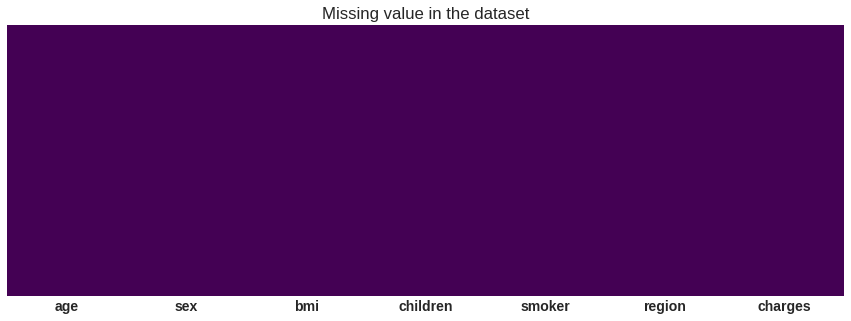

In [558]:
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

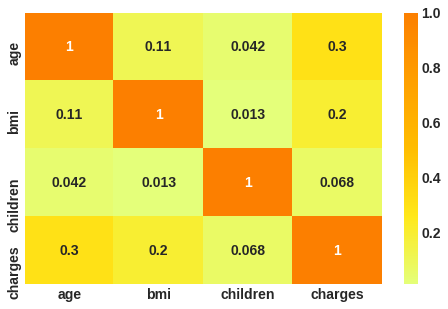

In [559]:
# correlation plot
corr_p = df.corr(method ='pearson')
sns.heatmap(corr_p, cmap = 'Wistia', annot= True);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


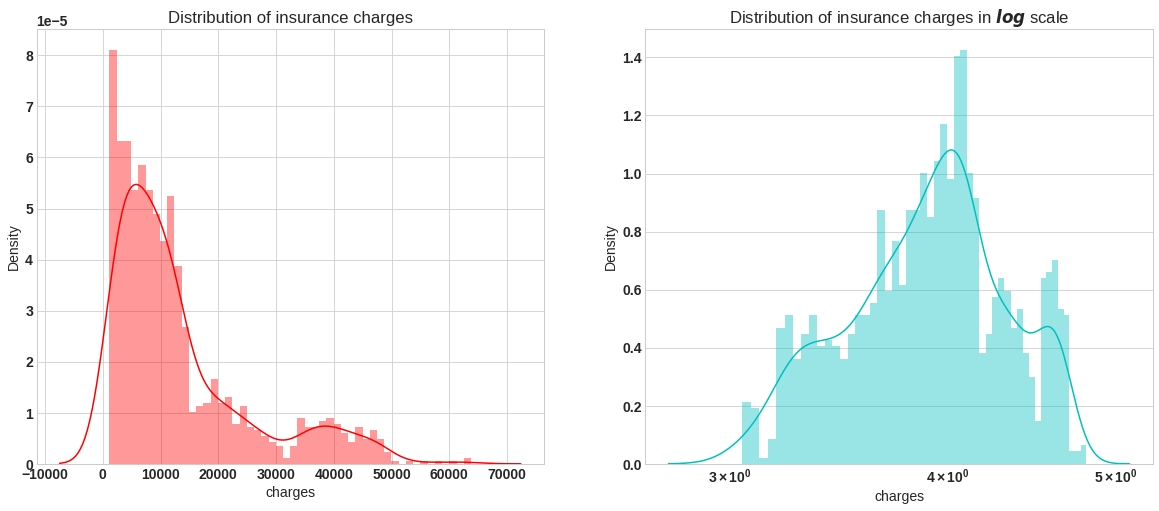

In [560]:
#Plot the distribution of the dependent variable
f= plt.figure(figsize=(20,8))

ax=f.add_subplot(121)
sns.distplot(df['charges'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance charges')

ax=f.add_subplot(122)
sns.distplot(np.log10(df['charges']),bins=50,color='c',ax=ax)
ax.set_title('Distribution of insurance charges in $log$ scale')
ax.set_xscale('log');

#Convert categorical data into numbers


*   Label Enocding
*   One hot Encoding


#Lable Encoding
Label encoding refers to transforming the word labels into numerical form so that the algorithms can understand how to operate on them.

#One hot Encoding
A One hot encoding is a representation of categorical variable as binary vectors.It allows the representation of categorical data to be 
more expresive. This first requires that the categorical values be mapped to integer values, that is label encoding. Then, each integer 
value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1.

You may take help of pandas get_dummies function for this. 

In [561]:
#Converting objects labels into categorical
df_label_enc[::] = df[::]
df_label_enc[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].astype('category')
df_label_enc.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [562]:
#Converting category labels into numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(df_label_enc.sex.drop_duplicates())
df_label_enc.sex = label.transform(df_label_enc.sex)
label.fit(df_label_enc.smoker.drop_duplicates())
df_label_enc.smoker = label.transform(df_label_enc.smoker)
label.fit(df_label_enc.region.drop_duplicates())
df_label_enc.region = label.transform(df_label_enc.region)
df_label_enc.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

In [563]:
df_label_enc.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


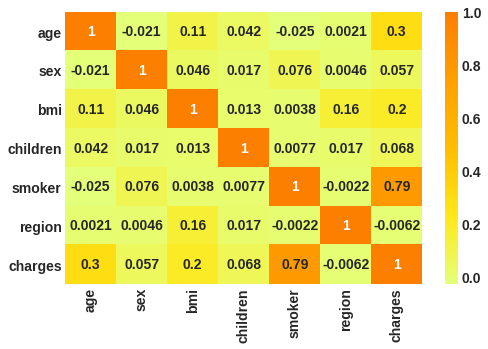

In [564]:
# correlation plot
corr_p = df_label_enc.corr(method ='pearson')
sns.heatmap(corr_p, cmap = 'Wistia', annot= True);

In [565]:
cat_columns = ['sex','children', 'smoker', 'region']
df_enc = pd.get_dummies(data = df, prefix = 'oneHotEnc', prefix_sep='_',
               columns = cat_columns,
               drop_first =True,
              dtype='int8')

In [566]:
cat_columns = ['sex','children', 'smoker', 'region']
df = pd.get_dummies(data = df, prefix = 'oneHotEnc', prefix_sep='_',
               columns = cat_columns,
               drop_first =True,
              dtype='int8')

In [567]:
df_enc.head()

,age,bmi,charges,oneHotEnc_male,oneHotEnc_1,oneHotEnc_2,oneHotEnc_3,oneHotEnc_4,oneHotEnc_5,oneHotEnc_yes,oneHotEnc_northwest,oneHotEnc_southeast,oneHotEnc_southwest
0,19,27.900,16884.92400,0,0,0,0,0,0,1,0,0,1
1,18,33.770,1725.55230,1,1,0,0,0,0,0,0,1,0
2,28,33.000,4449.46200,1,0,0,1,0,0,0,0,1,0
3,33,22.705,21984.47061,1,0,0,0,0,0,0,1,0,0
4,32,28.880,3866.85520,1,0,0,0,0,0,0,1,0,0


In [568]:
# Log transform of dependent variable
df_enc['charges'] = np.log(df_enc['charges'])

In [569]:
#Split the data into training and testing sets with ratio 0.3
from sklearn.model_selection import train_test_split
X = df_enc.drop('charges',axis=1) # independent variable
y = df_enc['charges'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [570]:
#Split the data into training and testing sets with ratio 0.3
from sklearn.model_selection import train_test_split
X_norm = df.drop('charges',axis=1) # independent variable
y_norm = df['charges'] # dependent variable

X_trainN, X_testN, y_trainN, y_testN = train_test_split(X_norm,y_norm,test_size=0.3,random_state=42)

#Model building

In [571]:
# Step 1: add x0 =1 to dataset
X_train_0 = np.c_[np.ones((X_train.shape[0],1)),X_train]
X_test_0 = np.c_[np.ones((X_test.shape[0],1)),X_test]

# Step2: build model
theta = np.matmul(np.linalg.inv( np.matmul(X_train_0.T,X_train_0) ), np.matmul(X_train_0.T,y_train)) 

# The parameters for linear regression model
parameter = ['theta_'+str(i) for i in range(X_train_0.shape[1])]
columns = ['intersect:x_0=1'] + list(X.columns.values)
parameter_df = pd.DataFrame({'Parameter':parameter,'Columns':columns,'theta':theta})

In [572]:
# Scikit Learn module
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train) 

#Parameter
sk_theta = [lin_reg.intercept_]+list(lin_reg.coef_)
parameter_df = parameter_df.join(pd.Series(sk_theta, name='sklearn_theta'))
parameter_df

,Parameter,Columns,theta,sklearn_theta
0,theta_0,intersect:x_0=1,7.017547,7.017547
1,theta_1,age,0.034570,0.034570
2,theta_2,bmi,0.013721,0.013721
3,theta_3,oneHotEnc_male,-0.080313,-0.080313
4,theta_4,oneHotEnc_1,0.146353,0.146353
5,theta_5,oneHotEnc_2,0.263423,0.263423
6,theta_6,oneHotEnc_3,0.208758,0.208758
7,theta_7,oneHotEnc_4,0.554547,0.554547
8,theta_8,oneHotEnc_5,0.414970,0.414970
9,theta_9,oneHotEnc_yes,1.557606,1.557606


In [573]:
# without natural log
# Step 1: add x0 =1 to dataset
X_train_0N = np.c_[np.ones((X_trainN.shape[0],1)),X_trainN]
X_test_0N = np.c_[np.ones((X_testN.shape[0],1)),X_testN]

# Step2: build model
thetaN = np.matmul(np.linalg.inv( np.matmul(X_train_0N.T,X_train_0N) ), np.matmul(X_train_0N.T,y_trainN)) 

# The parameters for linear regression model
parameterN = ['theta_'+str(i) for i in range(X_train_0N.shape[1])]
columnsN = ['intersect:x_0=1'] + list(X.columns.values)
parameter_dfN = pd.DataFrame({'Parameter_N':parameterN,'Columns_N':columnsN,'theta_N':thetaN})

In [574]:
#without natural log
# Scikit Learn module
from sklearn.linear_model import LinearRegression
lin_regN = LinearRegression()
lin_regN.fit(X_trainN,y_trainN) 

#Parameter
sk_thetaN = [lin_regN.intercept_]+list(lin_regN.coef_)
parameter_dfN = parameter_dfN.join(pd.Series(sk_thetaN, name='sklearn_theta_N'))
parameter_dfN

,Parameter_N,Columns_N,theta_N,sklearn_theta_N
0,theta_0,intersect:x_0=1,-12390.771228,-12390.771228
1,theta_1,age,262.646552,262.646552
2,theta_2,bmi,347.697254,347.697254
3,theta_3,oneHotEnc_male,85.709964,85.709964
4,theta_4,oneHotEnc_1,351.904470,351.904470
5,theta_5,oneHotEnc_2,1506.874887,1506.874887
6,theta_6,oneHotEnc_3,492.911285,492.911285
7,theta_7,oneHotEnc_4,4020.808684,4020.808684
8,theta_8,oneHotEnc_5,806.603012,806.603012
9,theta_9,oneHotEnc_yes,23654.470990,23654.470990


#Model evaluation

In [575]:
#prediction
y_pred =  np.matmul(X_test_0,theta)

#Evaluation: MSE
J_mse = np.sum((y_pred - y_test)**2)/ X_test_0.shape[0]

#without natural log
#prediction
y_predN =  np.matmul(X_test_0N,thetaN)

#Evaluation: MSE
J_mseN = np.sum((y_predN - y_testN)**2)/ X_test_0N.shape[0]

In [576]:
y_pred

array([ 9.18206967,  8.60291208, 11.0854699 ,  9.0184013 ,  9.51857961,
        8.7204616 ,  7.91223788,  9.59876054,  8.22275801,  9.16252167,
        9.94834565,  8.96669485,  8.40842315, 10.71090052, 10.96650508,
       10.75334603,  9.39651234, 10.68489279,  8.97498755, 10.35949333,
        8.41723945,  9.00733448,  7.88403663,  8.3242728 ,  9.26958411,
        9.33275804,  9.44622321,  8.50575164,  9.27076325,  7.80903001,
        9.22978047,  9.35365573,  8.05795634,  8.46607425,  8.26689341,
        9.03907669,  8.12495822,  8.9335299 , 10.77917691, 10.20468447,
        8.35462132,  8.20321696,  9.46390006,  9.25514652,  8.66798492,
        9.37341031,  8.39731487,  8.2968297 , 10.51964723,  8.63506871,
        9.52953104,  7.94481769,  9.04397011,  7.91796988,  9.18156658,
        9.36976563,  8.32368893, 10.17607341,  9.34963984,  9.30600891,
        9.50465362,  8.7457138 ,  9.62295983,  9.00467019,  9.23885034,
        8.41665092, 10.00083983,  9.14186097,  8.2660129 ,  8.11

In [577]:
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse)

The Mean Square Error(MSE) or J(theta) is:  0.1805122975889298


In [578]:
print('For distribution without applying normal log -the Mean Square Error(MSE) or J(theta) is: ',J_mseN)

For distribution without applying normal log -the Mean Square Error(MSE) or J(theta) is:  34083811.64751998


In [579]:
# sklearn regression module
y_pred_sk = lin_reg.predict(X_test)

#Evaluation: MSE
from sklearn.metrics import mean_squared_error
J_mse_sk = mean_squared_error(y_pred_sk, y_test)


In [580]:
y_pred_sk

array([ 9.18206967,  8.60291208, 11.0854699 ,  9.0184013 ,  9.51857961,
        8.7204616 ,  7.91223788,  9.59876054,  8.22275801,  9.16252167,
        9.94834565,  8.96669485,  8.40842315, 10.71090052, 10.96650508,
       10.75334603,  9.39651234, 10.68489279,  8.97498755, 10.35949333,
        8.41723945,  9.00733448,  7.88403663,  8.3242728 ,  9.26958411,
        9.33275804,  9.44622321,  8.50575164,  9.27076325,  7.80903001,
        9.22978047,  9.35365573,  8.05795634,  8.46607425,  8.26689341,
        9.03907669,  8.12495822,  8.9335299 , 10.77917691, 10.20468447,
        8.35462132,  8.20321696,  9.46390006,  9.25514652,  8.66798492,
        9.37341031,  8.39731487,  8.2968297 , 10.51964723,  8.63506871,
        9.52953104,  7.94481769,  9.04397011,  7.91796988,  9.18156658,
        9.36976563,  8.32368893, 10.17607341,  9.34963984,  9.30600891,
        9.50465362,  8.7457138 ,  9.62295983,  9.00467019,  9.23885034,
        8.41665092, 10.00083983,  9.14186097,  8.2660129 ,  8.11

In [581]:
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse_sk)

The Mean Square Error(MSE) or J(theta) is:  0.1805122975889313


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Check for Linearity:\n Actual Vs Predicted value')

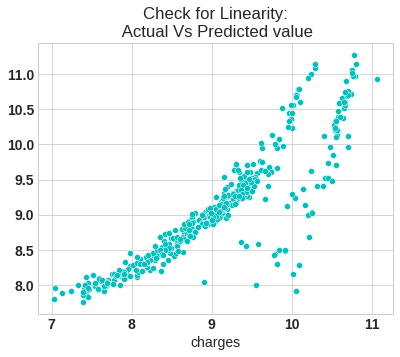

In [582]:
# Check for Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(y_test,y_pred,ax=ax,color='c')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Check for Linearity:\n Actual Vs Predicted value')

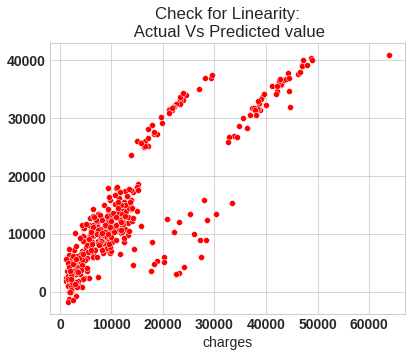

In [583]:
# Check for Linearity without natural log
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(y_testN,y_predN,ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Check for Linearity:\n Actual Vs Predicted value')

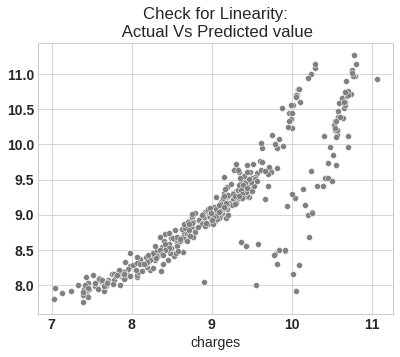

In [584]:
# Check for Linearity - sklearn model
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(y_test,y_pred_sk,ax=ax,color='grey')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

Text(0.5, 1.0, 'Check for Multivariate Normality: \nQ-Q Plot')

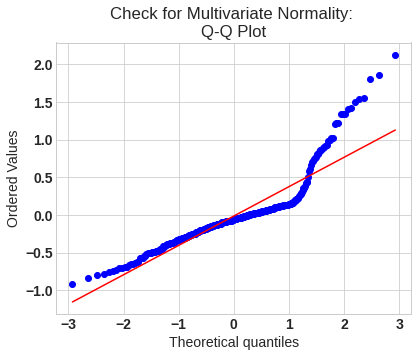

In [585]:
# Check for Multivariate Normality
# Quantile-Quantile plot 
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
import scipy as sp
sp.stats.probplot((y_test - y_pred),fit=True,plot=ax)
ax.set_title('Check for Multivariate Normality: \nQ-Q Plot')

Text(0.5, 1.0, 'Check for Multivariate Normality: \nQ-Q Plot \n sklearn model')

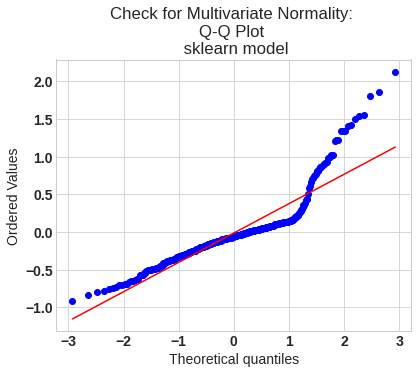

In [587]:
# Check for Multivariate Normality - sklearn model
# Quantile-Quantile plot 
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
import scipy as sp
sp.stats.probplot((y_test - y_pred_sk),fit=True,plot=ax)
ax.set_title('Check for Multivariate Normality: \nQ-Q Plot \n sklearn model' )